# Análise de Métodos de Pré Processamento

Esse notebook tem como objetivo analisar alguns métodos de pré processamento que irei utilizar antes da extração das características das imagens. Foram utilizados os seguintes métodos:

<ul>
    <li><b>Equalização de Histograma</b></li>
    <li><b>Contraste CLAHE</b></li>
    <li><b>Cores Opostas</b></li>
</ul>

A metodologia utilizada é aplicar os métodos depois da imagem ser convertida para um espectro de cor específico. Por exemplo: converte a imagem para o espectro de cor HSV e aplica o pré processamento nesse espectro.
<hr>

##### Importação das bibliotecas necessárias

In [1]:
import cv2

from matplotlib import pyplot as plt
import numpy as np

Utilizaremos uma imagem de reflexo vermelho diagnósticada como <i>"Normal"</i> para realizar as análises.

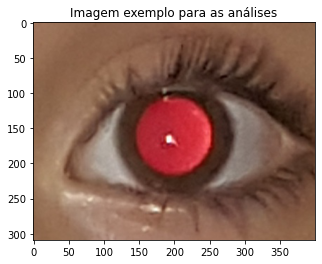

In [2]:
N_I   = "./data/olhos/normal/20170317_151849_1.jpg"

# Ler imagem
image = cv2.imread(N_I)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Imagem exemplo para as análises')
plt.show()

In [20]:
# funcao para plotar a comparacao
# da imagem original e imagem pre processada
def plotarComparacao(image, image_pre):
    f, axarr = plt.subplots(1,2, figsize=(16,4))

    axarr[0].imshow(image)
    axarr[1].imshow(image_pre)
    plt.show()

## Primeiro Pré Processamento: Equalização de Histograma
<hr>
Análise da Equalização de Histograma para os seguintes Espectros de Cor:
<ul>
    <li>RGB</li>
    <li>HSV</li>
    <li>LAB</li>
</ul>

In [8]:
def equalizarHist(image):
    
    ch_1, ch_2, ch_3 = cv2.split(image)

    ch_1 = cv2.equalizeHist(ch_1)
    ch_2 = cv2.equalizeHist(ch_2)
    ch_3 = cv2.equalizeHist(ch_3)

    image_eq = cv2.merge((ch_1, ch_2, ch_3))
    
    return image_eq

#### RGB

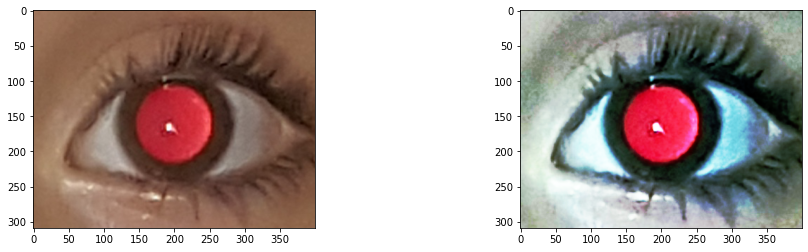

In [37]:
image_RGB = image

eq_RGB    = equalizarHist(image_RGB)
plotarComparacao(image_RGB, eq_RGB)

##### OBS: RESSALTA BASTANTE AS CORES

#### HSV

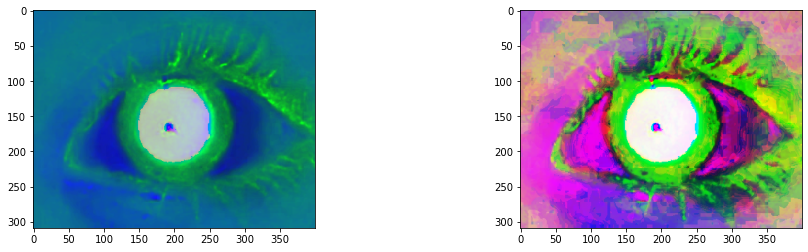

In [38]:
image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

eq_HSV    = equalizarHist(image_HSV)
plotarComparacao(image_HSV, eq_HSV)

#### Lab

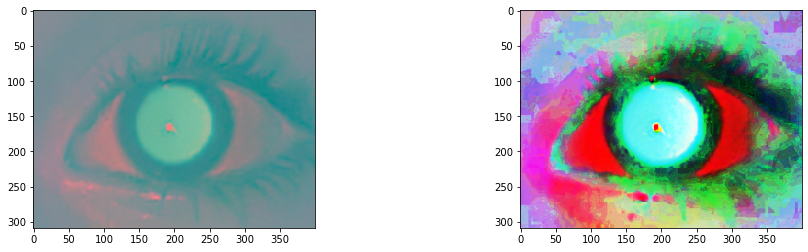

In [39]:
image_Lab = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)

eq_Lab    = equalizarHist(image_Lab)
plotarComparacao(image_Lab, eq_Lab)

## Segundo Pré Processamento: Contraste CLAHE
<hr>
Análise da aplicação do Contraste CLAHE para os seguintes Espectros de Cor:
<ul>
    <li>RGB</li>
    <li>LAB</li>
</ul>

In [30]:
def contrasteClahe(image, spectrum = 'rgb', clip_limit = 3):
    
    if spectrum == 'rgb':    
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
    l, a, b   = cv2.split(image)

    clahe     = cv2.createCLAHE(clipLimit = clip_limit, tileGridSize = (8, 8))
    l_clahe   = clahe.apply(l)

    image_clahe = cv2.merge((l_clahe, a, b))
    
    if spectrum == 'rgb':
        image_clahe = cv2.cvtColor(image_clahe, cv2.COLOR_LAB2RGB)
        
    return image_clahe

#### RGB

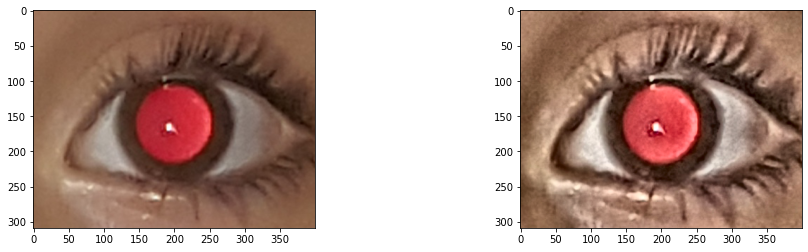

In [28]:
clahe_RGB  = contrasteClahe(image_RGB)
plotarComparacao(image_RGB, clahe_RGB)

#### Lab

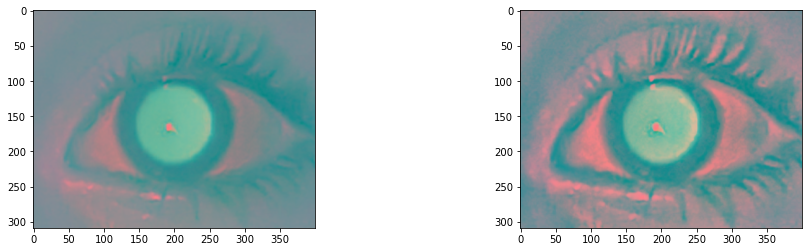

In [31]:
clahe_Lab  = contrasteClahe(image_Lab, 'lab')
plotarComparacao(image_Lab, clahe_Lab)

## Terceiro Pré Processamento: Cores Opostas
<hr>
Análise da aplicação do Contraste CLAHE para os seguintes Espectros de Cor:
<ul>
    <li>RGB</li>
</ul>

In [32]:
def coresOpostas(img):
    img_co = 255 - img
    
    return img_co

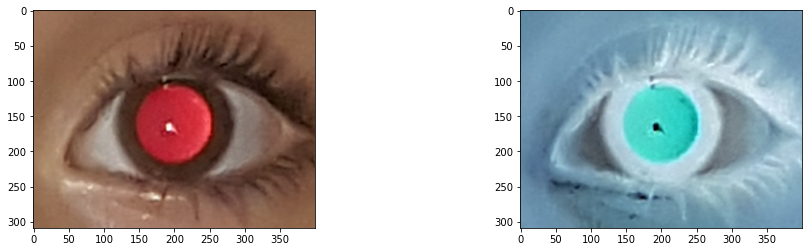

In [33]:
coresOp_RGB  = coresOpostas(image_RGB)
plotarComparacao(image_RGB, coresOp_RGB)

## Primeira Conclusão
<hr>
Os resultados da aplicação dos métodos do espectro RGB foram melhores do que aplicação em outros espectros. Dessa forma, creio que o pré processamento deve ser feito primeiro do espectro RGB e depois converter a imagem pro espectro desejável.

### Quarto Pré Processamento: Histograma de Cores no RGB e depois convertendo para HSV e Lab

#### RGB

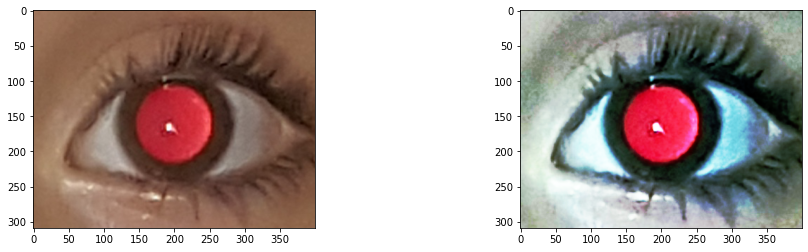

In [40]:
image_RGB = image

eq_RGB    = equalizarHist(image_RGB)
plotarComparacao(image_RGB, eq_RGB)

#### HSV

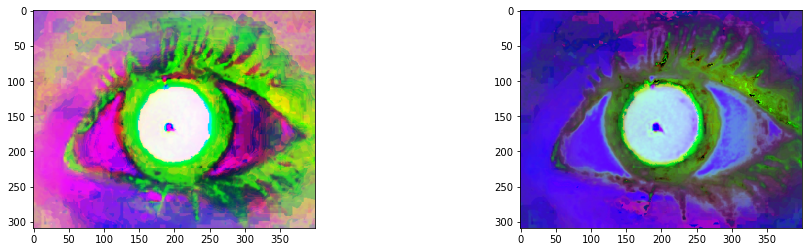

In [41]:
eq_RGB_HSV   = cv2.cvtColor(eq_RGB, cv2.COLOR_RGB2HSV)
plotarComparacao(eq_HSV, eq_RGB_HSV)

#### Lab

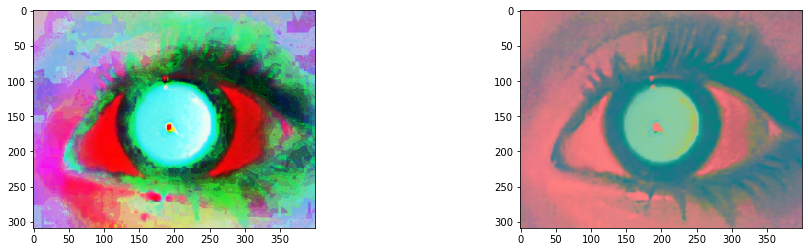

In [42]:
eq_RGB_Lab   = cv2.cvtColor(eq_RGB, cv2.COLOR_RGB2Lab)
plotarComparacao(eq_Lab, eq_RGB_Lab)

#### OBS: MELHORES RESULTADOS!

### Quinto Pré Processamento: Contraste CLAHE no RGB e depois convertendo para HSV e Lab

#### RGB

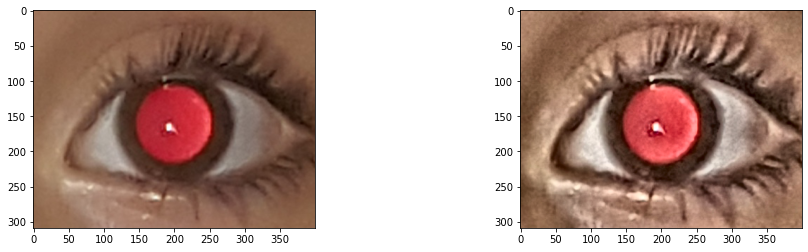

In [43]:
clahe_RGB  = contrasteClahe(image_RGB)
plotarComparacao(image_RGB, clahe_RGB)

#### HSV

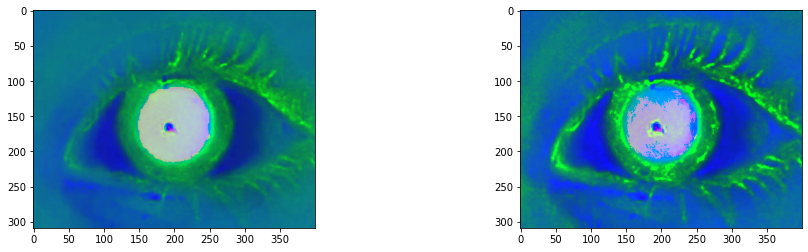

In [45]:
clahe_RGB_HSV = cv2.cvtColor(clahe_RGB, cv2.COLOR_RGB2HSV)
plotarComparacao(image_HSV, clahe_RGB_HSV)

#### Lab

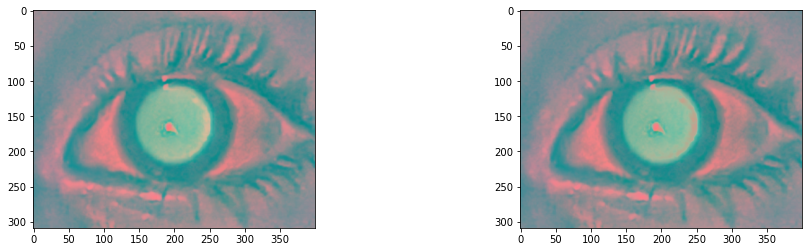

In [46]:
clahe_RGB_Lab = cv2.cvtColor(clahe_RGB, cv2.COLOR_RGB2Lab)
plotarComparacao(clahe_Lab, clahe_RGB_Lab)

### Sexto Pré Processamento: Cores Opostas no RGB e depois convertendo para HSV e Lab

#### RGB

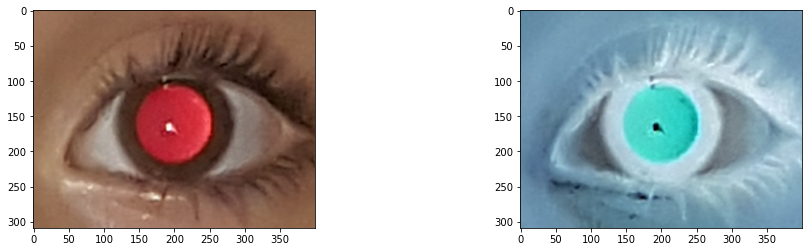

In [47]:
coresOp_RGB  = coresOpostas(image_RGB)
plotarComparacao(image_RGB, coresOp_RGB)

#### HSV

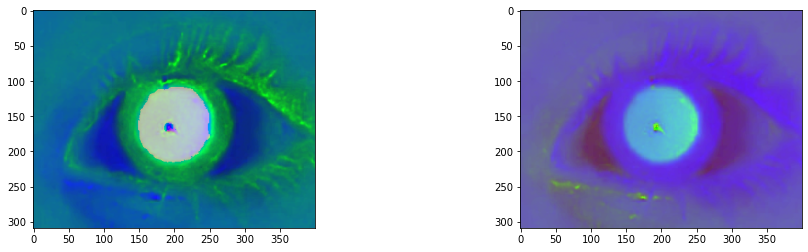

In [48]:
coresOp_RGB_HSV = cv2.cvtColor(coresOp_RGB, cv2.COLOR_RGB2HSV)
plotarComparacao(image_HSV, coresOp_RGB_HSV)

#### Lab

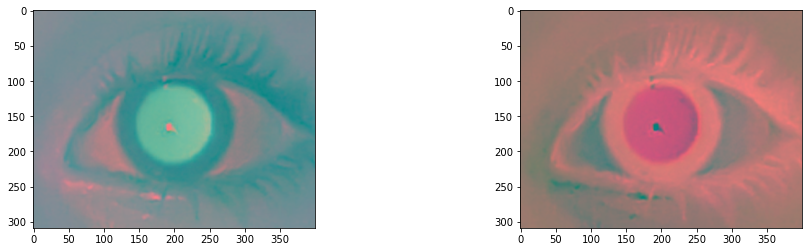

In [49]:
coresOp_RGB_Lab = cv2.cvtColor(coresOp_RGB, cv2.COLOR_RGB2Lab)
plotarComparacao(image_Lab, coresOp_RGB_Lab)

## Segunda Conclusão
<hr>
A segunda metodologia resultou em melhores resultados do que a primeira (imagens menos "estouradas"). Dessa forma, o pré processamento realizado nas imagens será de acordo com a segunda metodologia.